# Dataset Process for Image Classification
## Kaggle Dogs vs Cats
image path: data/dogs-vs-cats/train/

In [63]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.utils import shuffle
SAVE_OUTPUT = True # set True for saving output csv file

%matplotlib inline

In [64]:
data_dir = '../data/dogs-vs-cats/train/'
files = os.listdir(data_dir)
print(f"num images: {len(files)}")
print(files[:5])

num images: 25000
['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg']


### random check one image


../data/dogs-vs-cats/train/cat.2804.jpg


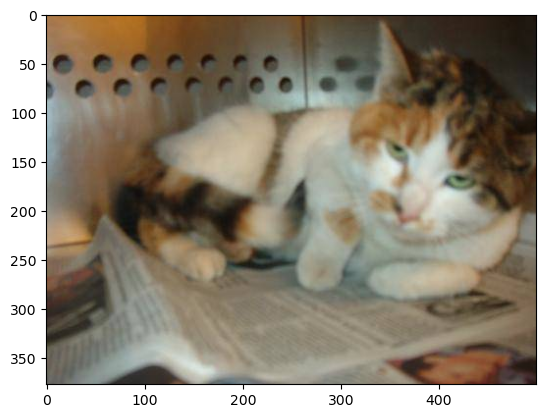

In [65]:
### random check one image
idx = random.randint(0,len(files))
img_path = data_dir + files[idx]
print(img_path)
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Make Dataset DataFrame

In [67]:
datas_list = []
for f in files:
    img_path = 'dogs-vs-cats/train/' + f
    ## set label:  cat 0, dog 1
    if f.split('.')[0] == "cat":
        datas_list.append([img_path, 0])  # cat
    else:
        datas_list.append([img_path, 1])  # dog
df = pd.DataFrame(data=datas_list, columns=["img_path", "label"])
df = shuffle(df)
df.head(10)

,img_path,label
20666,dogs-vs-cats/train/cat.5294.jpg,0
13952,dogs-vs-cats/train/dog.11182.jpg,1
22416,dogs-vs-cats/train/cat.10599.jpg,0
17142,dogs-vs-cats/train/cat.12059.jpg,0
15366,dogs-vs-cats/train/dog.2030.jpg,1
18847,dogs-vs-cats/train/cat.6205.jpg,0
22023,dogs-vs-cats/train/dog.2296.jpg,1
11684,dogs-vs-cats/train/dog.11945.jpg,1
14578,dogs-vs-cats/train/cat.4704.jpg,0
769,dogs-vs-cats/train/dog.832.jpg,1


## Split Dataset DataFrame to training set and validation set

In [68]:
from sklearn.model_selection import train_test_split

df_train, df_val =  train_test_split(df, test_size= .1)
print(df_train.shape)
print(df_val.shape)

(22500, 2)
(2500, 2)


In [69]:
## save to train.csv / val.csv
if SAVE_OUTPUT:
    df_train.to_csv('../data/dogs-vs-cats/train.csv', index=False)
    df_val.to_csv('../data/dogs-vs-cats/val.csv', index=False)

## Check train.csv / val.csv

In [70]:
## training set dataframe
train_df = pd.read_csv('../data/dogs-vs-cats/train.csv')

## validation set dataframe
val_df = pd.read_csv('../data/dogs-vs-cats/val.csv')

print(train_df.shape)
print(val_df.shape)

(22500, 2)
(2500, 2)


In [71]:
train_df.head()

,img_path,label
0,dogs-vs-cats/train/cat.11676.jpg,0
1,dogs-vs-cats/train/cat.12061.jpg,0
2,dogs-vs-cats/train/cat.6045.jpg,0
3,dogs-vs-cats/train/dog.12411.jpg,1
4,dogs-vs-cats/train/cat.1897.jpg,0


In [72]:
train_df.describe()

,label
count,22500.000000
mean,0.499733
std,0.500011
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [73]:
val_df.head()

,img_path,label
0,dogs-vs-cats/train/cat.12099.jpg,0
1,dogs-vs-cats/train/dog.4043.jpg,1
2,dogs-vs-cats/train/dog.9270.jpg,1
3,dogs-vs-cats/train/dog.2321.jpg,1
4,dogs-vs-cats/train/cat.7908.jpg,0


In [74]:
val_df.describe()

,label
count,2500.000000
mean,0.502400
std,0.500094
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000
